In [2]:
# Lets start by importing everything we think we might need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Extract the csv and look at the first 5 entries
reviews = pd.read_csv("../amazon-fine-food-reviews/Reviews.csv")
reviews.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
# Check out descriptive statistics and general column info
reviews.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null int64
Summary                   568427 non-null object
Text                      568454 non-null object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [6]:
reviews.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
reviews.nunique()

Id                        568454
ProductId                  74258
UserId                    256059
ProfileName               218416
HelpfulnessNumerator         231
HelpfulnessDenominator       234
Score                          5
Time                        3168
Summary                   295742
Text                      393579
dtype: int64

### First Look at Data:
1. ID: Every review has a unique ID, giving us a total count of **568,454** reviews. This is an int.
2. ProductID: There are **74,258** unique products. The productID is a string that includes capital letters and nums.
3. UserID: There are a total of * (5*256,059** user. This column is a string that includes capital letters and numbers.
4. ProfileName: There are **16** instances with **NaN** ProfileNames, leaving us with **218,416** unique profiles. This is a string that the user creates.
5. HelpfulnessNumerator: Int that represents how many people found the review helpful.
6. HelpfulnessDenominator: Int that represents how many people didn't find the review helpful.
7. Score: Review from 1-5 (1: Poor, 5: Excellent)
8. Summary: String that represents the subject line of their review. **27 null cells**.
9. Text: Contains full review text, although the display will show an "..." to represent that it doesn't show the entire text.

Now lets do some simply graphs and charts with the group by function

In [8]:
reviews.groupby(['ProductId', 'UserId']).head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [9]:
import datetime
reviews['Time'] = reviews['Time'].apply(datetime.datetime.fromtimestamp)

In [23]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...


In [53]:
# On first glance, it looks like the Time stamp varies between 5 pm and 4 pm. Let's visualize
reviews['Hour'] = reviews['Time'].apply(lambda x: x.hour)
reviews['Weekday'] = reviews['Time'].apply(lambda x: x.dayofweek)
reviews['Day'] = reviews['Time'].apply(lambda x: x.dayofyear)
reviews['Year'] = reviews['Time'].apply(lambda x: x.year)

(array([185934.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0., 382520.]),
 array([16. , 16.1, 16.2, 16.3, 16.4, 16.5, 16.6, 16.7, 16.8, 16.9, 17. ]),
 <a list of 10 Patch objects>)

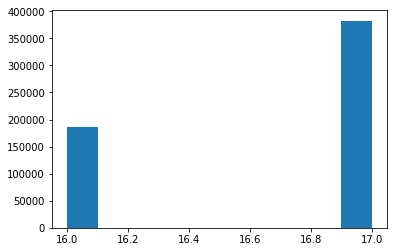

In [54]:
plt.hist(reviews['Hour'])

(array([3.8000e+01, 1.3000e+01, 7.3000e+01, 6.9300e+02, 1.3440e+03,
        6.6860e+03, 5.6502e+04, 5.5403e+04, 8.6092e+04, 3.6161e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

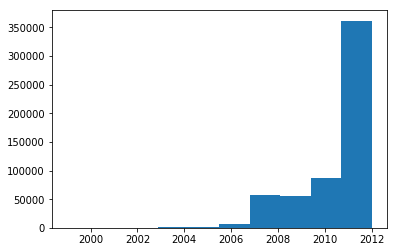

In [56]:
plt.hist(reviews['Year'])

In [59]:
reviews.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Day,Weekday,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-26 17:00:00,Good Quality Dog Food,I have bought several of the Vitality canned d...,17,116,1,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-06 17:00:00,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,17,250,3,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-17 17:00:00,"""Delight"" says it all",This is a confection that has been around a fe...,17,230,6,2008


In [42]:
reviews.groupby('Hour').mean()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Day
Hour,,,,,
16,284114.073784,2.023546,2.569035,4.175638,154.615563
17,284282.633823,1.607848,2.063435,4.186874,194.052094


There are 185934 entries submitted at 4 pm, and 382520 entries submitted at 5 pm.


(array([1.60000e+01, 1.10000e+01, 1.90000e+01, 3.74000e+02, 7.74000e+02,
        3.67200e+03, 3.43250e+04, 3.55260e+04, 5.34210e+04, 2.54382e+05]),
 array([1999. , 2000.3, 2001.6, 2002.9, 2004.2, 2005.5, 2006.8, 2008.1,
        2009.4, 2010.7, 2012. ]),
 <a list of 10 Patch objects>)

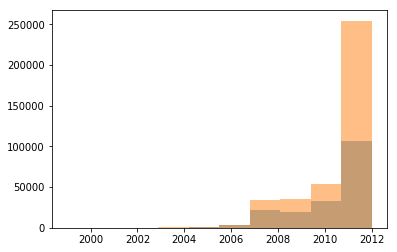

In [57]:
hour16 = reviews[reviews.Hour == 16]
hour17 = reviews[reviews.Hour == 17]
print("There are",hour16.shape[0],"entries submitted at 4 pm, and", hour17.shape[0], "entries submitted at 5 pm.")
plt.hist(hour16.Year,alpha = 0.5)
plt.hist(hour17.Year, alpha = 0.5)

(array([32398., 35691., 36064., 36609., 35963., 38045., 40334., 44142.,
        44595., 38679.]),
 array([ 67. ,  91.3, 115.6, 139.9, 164.2, 188.5, 212.8, 237.1, 261.4,
        285.7, 310. ]),
 <a list of 10 Patch objects>)

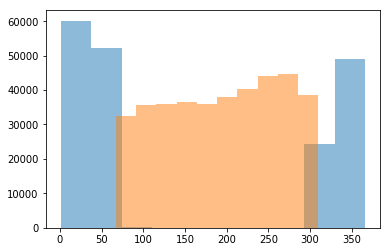

In [58]:
plt.hist(hour16.Day,alpha = 0.5)
plt.hist(hour17.Day, alpha = 0.5)

Above shows the relationship between 4 pm and 5 pm dont seem to be related to other time factors

In [62]:
plt.plot(reviews.Weekday, reviews.Score)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x10c9f99d8> (for post_execute):


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

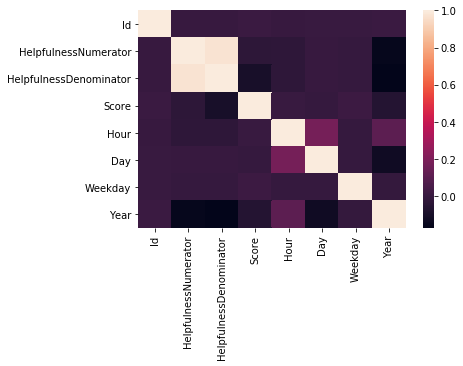

In [67]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix
corr = reviews.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11aed63c8>]],
      dtype=object)

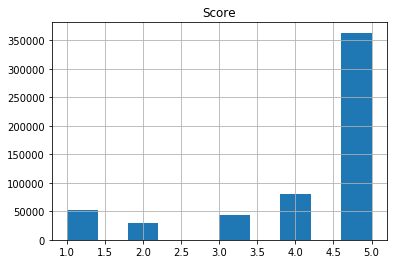

In [76]:
reviews.hist('Score')

Now lets look more into the products and users themselves.

In [84]:
reviews.groupby('UserId').Score.agg(['mean','count'])

,mean,count
UserId,,
#oc-R103C0QSV1DF5E,5.000000,1
#oc-R109MU5OBBZ59U,5.000000,1
#oc-R10LFEMQEW6QGZ,5.000000,1
#oc-R10LT57ZGIB140,3.000000,1
#oc-R10UA029WVWIUI,1.000000,1
#oc-R115TNMSPFT9I7,2.000000,2
#oc-R119LM8D59ZW8Y,1.000000,1
#oc-R11D9D7SHXIJB9,5.000000,3
#oc-R11D9LKDAN5NQJ,3.000000,1


Check for duplicates


In [87]:
reviews.shape

(568454, 14)

In [88]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 14 columns):
Id                        568454 non-null int64
ProductId                 568454 non-null object
UserId                    568454 non-null object
ProfileName               568438 non-null object
HelpfulnessNumerator      568454 non-null int64
HelpfulnessDenominator    568454 non-null int64
Score                     568454 non-null int64
Time                      568454 non-null datetime64[ns]
Summary                   568427 non-null object
Text                      568454 non-null object
Hour                      568454 non-null int64
Day                       568454 non-null int64
Weekday                   568454 non-null int64
Year                      568454 non-null int64
dtypes: datetime64[ns](1), int64(8), object(5)
memory usage: 60.7+ MB


In [105]:

4
# Select all duplicate rows based on one column
entriesWithDuplicates = reviews[reviews.duplicated(['UserId','ProductId','Score','Text'],keep = False)]
print(entriesWithDuplicates.shape)
entriesWithDuplicates.head(3)

(2082, 14)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Day,Weekday,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,11,6,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,11,6,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,350,0,2008


In [96]:
reviews[reviews['UserId'] == 'A3PJZ8TU8FDQ1K']

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Hour,Day,Weekday,Year
466,467,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,11,6,2009
467,468,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2009-01-11 16:00:00,"Crunchy, salty, sweet...finally, a Superbowl s...",These Honey Dijon chips bring a terrific balan...,16,11,6,2009
574,575,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,2,2,5,2009-01-11 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,11,6,2009
602,603,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2009-03-14 17:00:00,"One bite and you'll become a ""chippoisseur""","As an Oregonian, I make a point of sharing the...",17,73,5,2009
603,604,B000G6RYNE,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2008-12-15 16:00:00,"One bite and you'll become a ""chippoisseur""","I'm addicted to salty and tangy flavors, so wh...",16,350,0,2008
6797,6798,B001LG945O,A3PJZ8TU8FDQ1K,Jared Castle,0,0,4,2009-02-25 16:00:00,Tasty refuel after exercise or liven up a lunc...,As part of Amazon's Vine Program I received tw...,16,56,2,2009
7988,7989,B004WM0ZTS,A3PJZ8TU8FDQ1K,Jared Castle,0,1,4,2010-11-05 17:00:00,"In a pinch, Via is a portable and affordable c...","Behind the 12 packets of Via instant coffee, S...",17,309,4,2010
13972,13973,B00434KRHU,A3PJZ8TU8FDQ1K,Jared Castle,2,2,4,2011-09-24 17:00:00,"You get convenience and value, feed two boys f...",Hamburger Helper is a quick fix dinner for our...,17,267,5,2011
15764,15765,B007TJGZ5E,A3PJZ8TU8FDQ1K,Jared Castle,0,0,5,2011-07-18 17:00:00,Delicious medium-roast blend with complex tones,"<span class=""tiny""> Length:: 1:30 Mins<br /><b...",17,199,0,2011
15828,15829,B007TJGZ5E,A3PJZ8TU8FDQ1K,Jared Castle,1,1,5,2011-07-18 17:00:00,Delicious medium-roast blend with complex tones,"<span class=""tiny""> Length:: 1:30 Mins<br /><b...",17,199,0,2011


In [119]:
entriesWithDuplicates.groupby(['UserId','ProductId','Text']).agg({'HelpfulnessNumerator': 'sum','HelpfulnessDenominator':'sum', 
                                                     'Score': 'mean', 'Text':'count'})

HelpfulnessNumerator  \
UserId         ProductId  Text                                                                       
A10GBEDF4RCOVI B0037272UY My girlfriend and I have been rescuing, fosteri...                    26   
A10H24TDLK2VDP B003TC7WN4 First, let me say that I prefer extra-bold K-Cu...                     2   
               B003VXFK44 First, let me say that I prefer extra-bold K-Cu...                     2   
               B003VXHGDM First, let me say that I prefer extra-bold K-Cu...                     2   
               B003VXHGE6 First, let me say that I prefer extra-bold K-Cu...                     2   
               B003VXHGPK First, let me say that I prefer extra-bold K-Cu...                     2   
               B003VXL0V6 First, let me say that I prefer extra-bold K-Cu...                     2   
               B004FGWU9O First, let me say that I prefer extra-bold K-Cu...                     2   
               B006N3IE6A First, let me say that I prefer extra-bold K-Cu...                     2   
               B006N3IG4K First, let me say that I prefer extra-bold K-Cu...                     2   
A10NJPL8SA82WC B0026RQTGE These things are awesome.  These Greenies reall...                     0   
               B002QWHJOU These things are awesome.  These Greenies reall...                     0   
               B002QWP89S These things are awesome.  These Greenies reall...                     0   
               B002QWP8H0 These things are awesome.  These Greenies reall...                     0   
A10RYZVFVJQ9EZ B0031U9UZC Can't say enough about these products...Amazing...                     2   
               B0031U9VI8 Can't say enough about these products...Amazing...                     2   
               B0031UBWLM Can't say enough about these products...Amazing...                     2   
               B0031UBXDE Can't say enough about these products...Amazing...                     2   
A11ATMWV9U51YF B001P05K6I Please be careful with this product. My pug alm...                    15   
A14OWDYHPAXSLZ B0029NGX34 it is really good or really bad<br />so overall...                     2   
               B0029NGY4M it is really good or really bad<br />so overall...                     2   
               B0029NIFXK it is really good or really bad<br />so overall...                     2   
               B0029NIGMA it is really good or really bad<br />so overall...                     2   
               B0029NII3C it is really good or really bad<br />so overall...                     2   
               B0029NIIKK it is really good or really bad<br />so overall...                     2   
               B0029NLV8G it is really good or really bad<br />so overall...                     2   
A17V9XL4CWTQ6G B0006U7T1C I have studied canine nutrition for the last 5 ...                    25   
A187LYIJPWJYSA B0036FBZG4 I loved the flavor of the vanilla shakes until ...                     3   
A18TOZ8633JCXK B002R8J7YS We have a Newfoundland that we like to pamper. ...                     2   
               B002R8SLUY We have a Newfoundland that we like to pamper. ...                     2   
...                                                                                            ...   
AV0HWIE7H9GWQ  B0030VBQOK I have a one and two year old who just love the...                     0   
               B0030VBRCG I have a one and two year old who just love the...                     0   
               B0030VJ818 I have a one and two year old who just love the...                     0   
               B0030VJ8E0 I have a one and two year old who just love the...                     0   
               B0030VJ8PE I have a one and two year old who just love the...                     0   
AVCN8RNU02QKN  B0007LXU9A These are great!  Low calorie, light, crispy, g...                     3   
               B000EHIVIW These are great!  Low calorie, light, crispy, g...                     3  

What should we do with duplicates?